In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd

# Employment Rate

In [2]:
# https://datausa.io/profile/geo/texas
employment = pd.read_csv('/Users/trevorban/Desktop/zri-data/Employment by Industry Sector.csv')

In [3]:
employment.Date = pd.to_datetime(employment.Date)

In [4]:
employment.Supersector.unique()

array(['Mining, Logging, and Construction', 'Manufacturing',
       'Trade, Transportation, and Utilities', 'Information',
       'Financial Activities', 'Professional and Business Services',
       'Education and Health Services', 'Leisure and Hospitality',
       'Other Services', 'Government'], dtype=object)

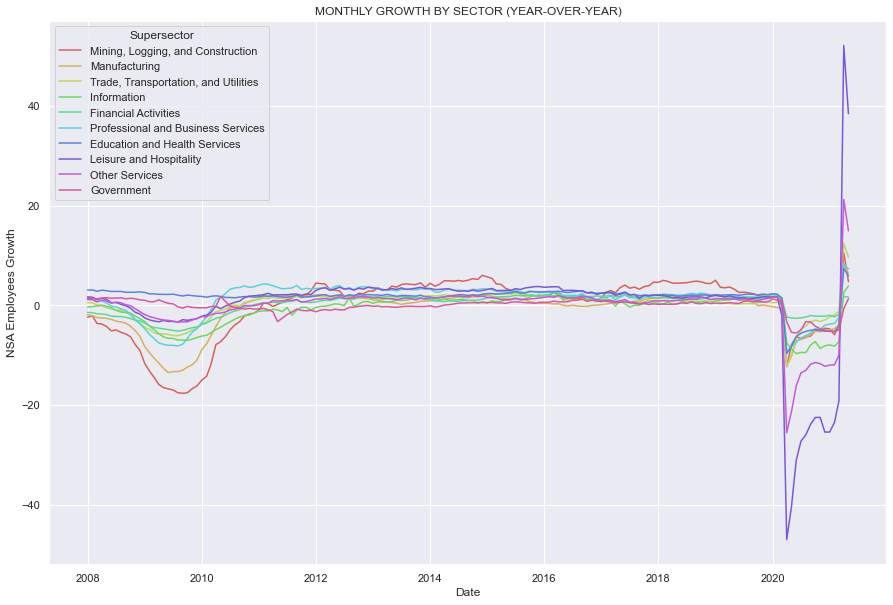

In [46]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data = employment, x='Date', y='NSA Employees Growth', hue='Supersector', palette='hls')
plt.title('MONTHLY GROWTH BY SECTOR (YEAR-OVER-YEAR)');

In [6]:
employment

,Month of Year ID,Month of Year,Supersector ID,Supersector,NSA Employees,Date,NSA Employees Growth
0,2008-01,"January, 2008",15,"Mining, Logging, and Construction",7801800,2008-01-01,-2.393314
1,2008-01,"January, 2008",30,Manufacturing,13705900,2008-01-01,-1.891182
2,2008-01,"January, 2008",40,"Trade, Transportation, and Utilities",26563500,2008-01-01,0.536300
3,2008-01,"January, 2008",50,Information,3004500,2008-01-01,-0.354869
4,2008-01,"January, 2008",55,Financial Activities,8194000,2008-01-01,-1.425564
...,...,...,...,...,...,...,...
1605,2021-05,"May, 2021",60,Professional and Business Services,20975300,2021-05-01,7.310847
1606,2021-05,"May, 2021",65,Education and Health Services,23592300,2021-05-01,5.862952
1607,2021-05,"May, 2021",70,Leisure and Hospitality,13867900,2021-05-01,38.429826
1608,2021-05,"May, 2021",80,Other Services,5307200,2021-05-01,14.934165


In [30]:
test = employment.groupby(by='Month of Year').sum('NSA Employees').reset_index()[['Month of Year', 'NSA Employees']]

In [32]:
test['Month of Year'] = pd.to_datetime(test['Month of Year'])

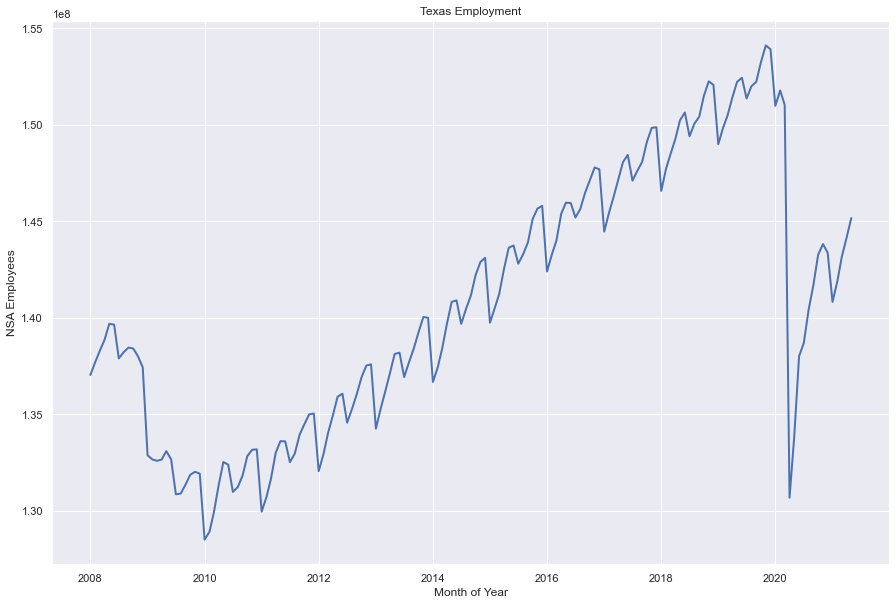

In [44]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data=test, x='Month of Year', y='NSA Employees', linewidth=2)
plt.title('Texas Employment');

# Income by Region

In [7]:
# https://datausa.io/profile/geo/texas
income = pd.read_csv('/Users/trevorban/Desktop/zri-data/Median Household Income.csv')


In [8]:
income['Geography'].unique()

array(['United States', 'Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma',
       'Texas', 'Austin-Round Rock, TX',
       'Dallas-Fort Worth-Arlington, TX',
       'Houston-The Woodlands-Sugar Land, TX',
       'San Antonio-New Braunfels, TX'], dtype=object)

In [9]:
income = income[income['Geography'].isin(['United States', 'Texas', 'Austin-Round Rock, TX',
     'Dallas-Fort Worth-Arlington, TX',
     'Houston-The Woodlands-Sugar Land, TX',
     'San Antonio-New Braunfels, TX'])]

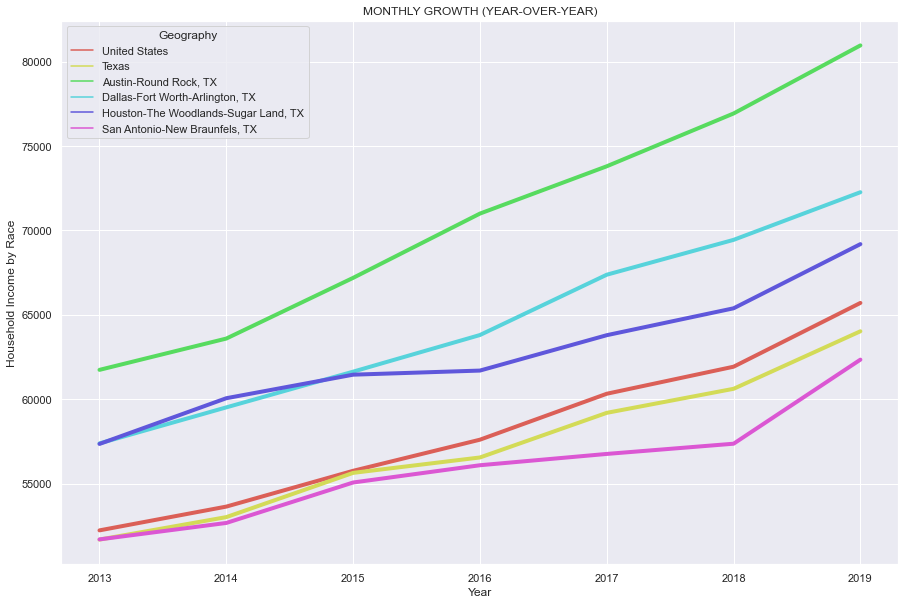

In [10]:
sns.set_theme()
fig,ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data = income, x='Year', y='Household Income by Race', hue='Geography', palette='hls', linewidth=4)
plt.title('MONTHLY GROWTH (YEAR-OVER-YEAR)');

# GDP

In [11]:
#https://www.statista.com/statistics/188132/gdp-of-the-us-federal-state-of-texas-since-1997/

df = pd.DataFrame({'Year': 
                   [2000,
                    2001,
                    2002,
                    2003,
                    2004,
                    2005,
                    2006,
                    2007,
                    2008,
                    2009,
                    2010,
                    2011,
                    2012,
                    2013,
                    2014,
                    2015,
                    2016,
                    2017,
                    2018,
                    2019,
                    2020], 
                  'GDP':
                  [998.15,
                    1021.69,
                    1042.35,
                    1048.18,
                    1104.05,
                    1132.55,
                    1209.02,
                    1273.88,
                    1274.66,
                    1270.96,
                    1301.81,
                    1343.70,
                    1410.45,
                    1470.46,
                    1518.61,
                    1595.97,
                    1606.58,
                    1651.33,
                    1715.23,
                    1764.36,
                    1703.07]})


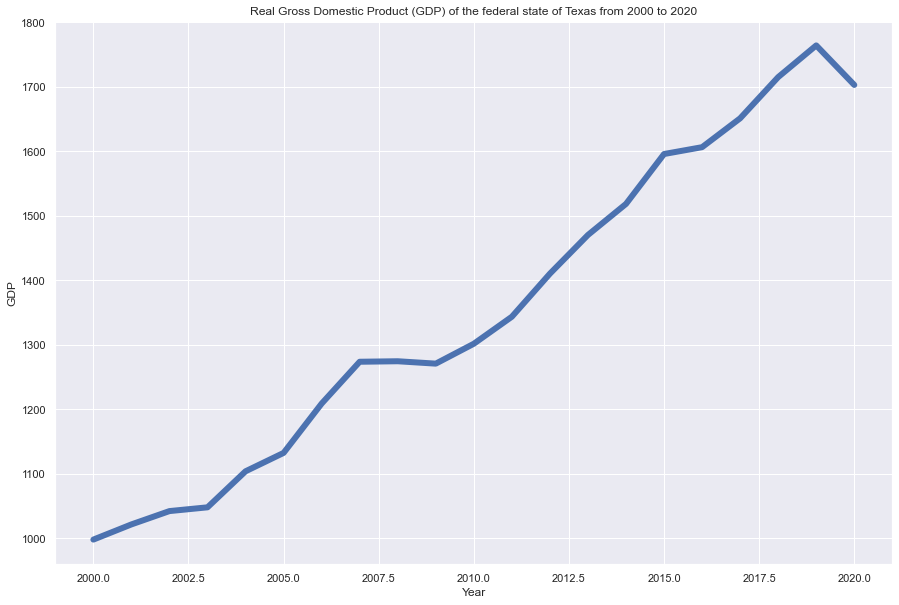

In [12]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=df['Year'], y=df['GDP'], linewidth=6)
plt.title('Real Gross Domestic Product (GDP) of the federal state of Texas from 2000 to 2020');


In [13]:
# https://datausa.io/profile/geo/texas
pop = pd.read_csv('/Users/trevorban/Desktop/zri-data/Race and Ethnicity.csv')


In [14]:
pop = pop.groupby('Year').sum().reset_index()[['Year', 'Population']]

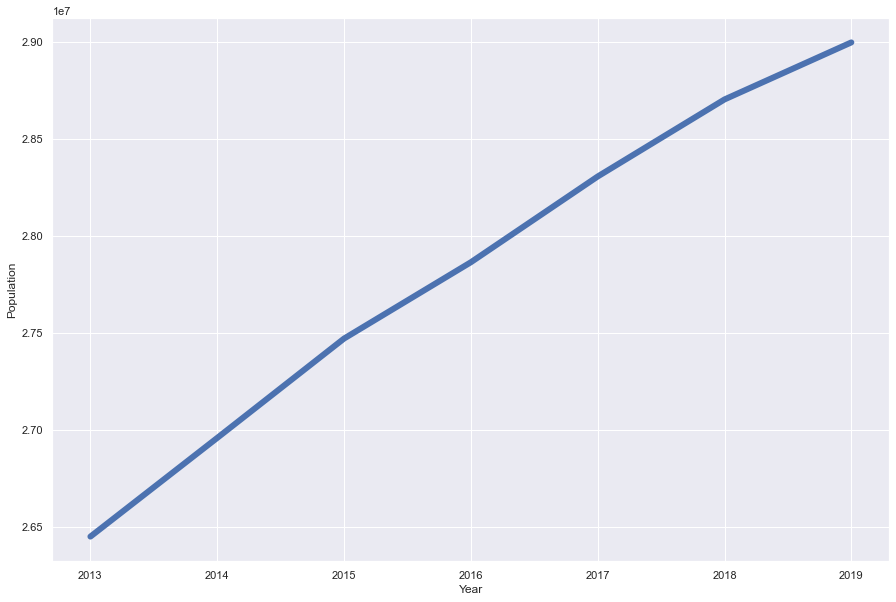

In [15]:
fig,ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x=pop['Year'], y=pop['Population'], linewidth=6);


# Population by county

In [16]:
# https://demographics.texas.gov/Data/TPEPP/Estimates/
a = pd.read_csv('/Users/trevorban/Desktop/zri-data/11.csv')
b = pd.read_csv('/Users/trevorban/Desktop/zri-data/12.csv')
c = pd.read_csv('/Users/trevorban/Desktop/zri-data/13.csv')
d = pd.read_csv('/Users/trevorban/Desktop/zri-data/14.csv')
e = pd.read_csv('/Users/trevorban/Desktop/zri-data/15.csv')
f = pd.read_csv('/Users/trevorban/Desktop/zri-data/16.csv')
g = pd.read_csv('/Users/trevorban/Desktop/zri-data/17.csv')
h = pd.read_csv('/Users/trevorban/Desktop/zri-data/18.csv')
i = pd.read_csv('/Users/trevorban/Desktop/zri-data/19.csv')

In [17]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.2017.html
county_shp = gpd.read_file('/Users/trevorban/Downloads/cb_2017_48_cousub_500k/cb_2017_48_cousub_500k.shp')

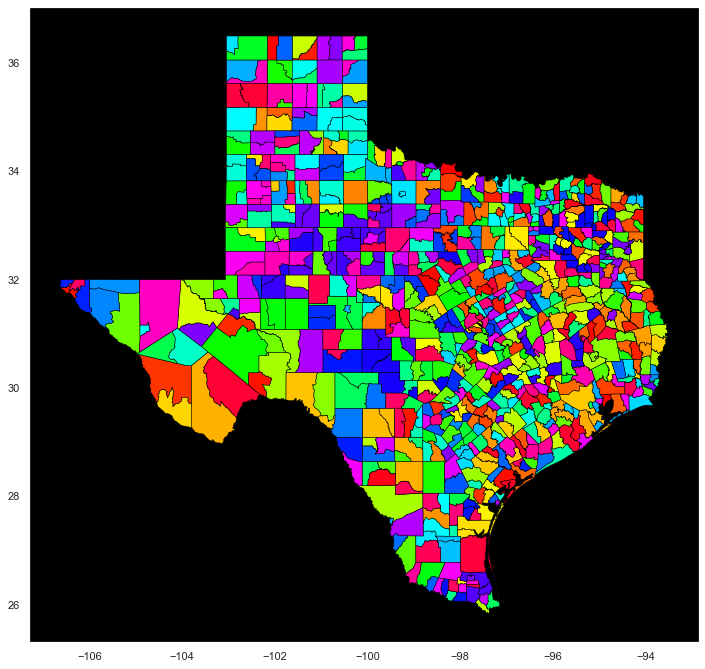

In [18]:
fig,ax = plt.subplots(figsize=(12,12))
county_shp.plot(ax=ax, zorder=2, legend=False, cmap='hsv', edgecolor='black', linewidth=.5)
ax.set(facecolor = "black")
ax.grid(False)

In [19]:
county_shp['COUNTYFP'] = county_shp['COUNTYFP'].astype(int)

In [20]:
county_shp.sort_values(by='NAME')

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
502,48,189,90005,01938476,0600000US4818990005,4818990005,Abernathy,22,607826881,132501,"POLYGON ((-102.08763 34.02656, -102.08589 34.0..."
639,48,441,90010,01938477,0600000US4844190010,4844190010,Abilene,22,489544955,4270556,"POLYGON ((-99.88763 32.44469, -99.88625 32.446..."
558,48,281,90015,01938478,0600000US4828190015,4828190015,Adamsville,22,601631835,156521,"POLYGON ((-98.31058 31.38363, -98.26679 31.410..."
835,48,359,90017,01939287,0600000US4835990017,4835990017,Adrian,22,1605399313,240483,"POLYGON ((-103.04278 35.24124, -103.04237 35.2..."
705,48,419,90020,01938479,0600000US4841990020,4841990020,Aiken-Neuville,22,382587709,2447958,"POLYGON ((-94.40586 31.66589, -94.40589 31.667..."
...,...,...,...,...,...,...,...,...,...,...,...
200,48,123,94295,01939341,0600000US4812394295,4812394295,Yoakum,22,460578334,1202944,"POLYGON ((-97.33984 29.26901, -97.33864 29.269..."
120,48,285,94300,01939342,0600000US4828594300,4828594300,Yoakum,22,671764863,189807,"POLYGON ((-97.19517 29.34513, -97.19448 29.350..."
354,48,123,94305,01939343,0600000US4812394305,4812394305,Yorktown,22,712719689,808162,"POLYGON ((-97.75511 29.00711, -97.75198 29.009..."
241,48,505,94310,01939344,0600000US4850594310,4850594310,Zapata,22,1985795926,146176329,"POLYGON ((-99.39311 26.96403, -99.39019 26.966..."


In [21]:
x = i.merge(county_shp, how='inner', left_on='FIPS', right_on='COUNTYFP')

In [22]:
x = gpd.GeoDataFrame(x)

In [23]:
x.shape

(862, 20)

Text(0.5, 1.0, 'Percent Change in Population from 2010 to 2020 by County')

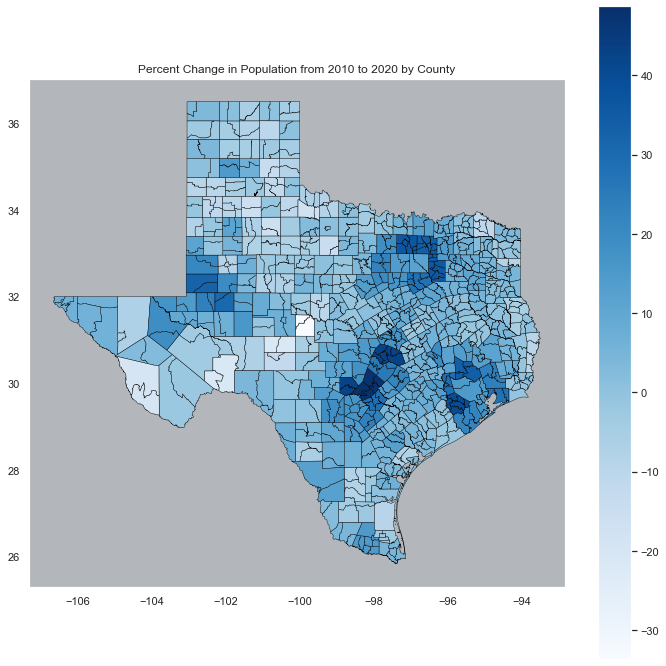

In [24]:
fig,ax = plt.subplots(figsize=(12,12))
x.plot(ax=ax, zorder=2, legend=True, cmap='Blues', edgecolor='black', linewidth=.4, column='pct_chg_10_20')
ax.set(facecolor = "#B3B6BA")
ax.grid(False)
plt.title('Percent Change in Population from 2010 to 2020 by County')

Text(0.5, 1.0, 'Percent Change in Population from 2010 to 2020 by County')

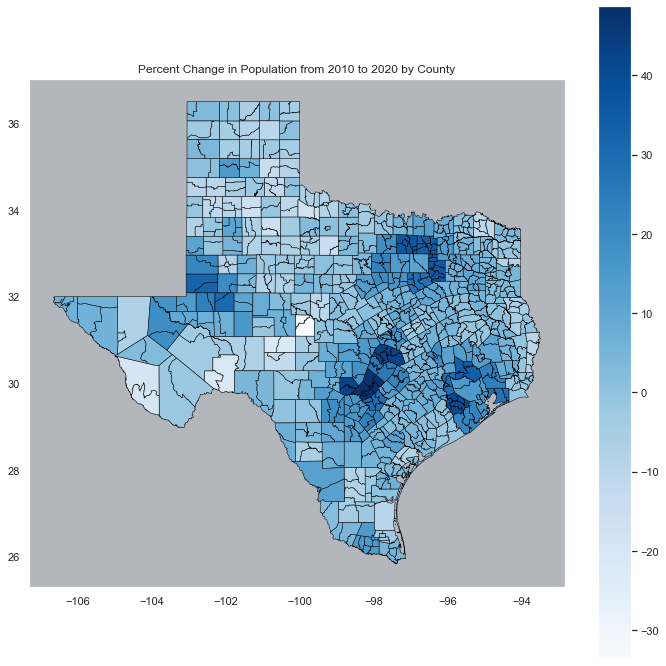

In [25]:
fig,ax = plt.subplots(figsize=(12,12))
x.plot(ax=ax, zorder=2, legend=True, cmap='Blues', edgecolor='black', linewidth=.5, column='pct_chg_10_20')
ax.set(facecolor = "#B3B6BA")
ax.grid(False)
plt.title('Percent Change in Population from 2010 to 2020 by County')

In [47]:
pop = pd.read_csv('/Users/trevorban/Desktop/zri-data/Untitled spreadsheet - Sheet1.csv')


In [49]:
# https://data.houstontx.gov/dataset/zip-codes-in-the-region/resource/bb634e26-cb64-44e4-8b86-3a37d113886b

zips = gpd.read_file('/Users/trevorban/Downloads/tl_2019_us_zcta510/tl_2019_us_zcta510.shp')

In [50]:
zips['GEOID10'] = zips['GEOID10'].astype(int)

In [51]:
popzip = pop.merge(zips, how='inner', left_on='zip', right_on='GEOID10')

In [52]:
popzip = gpd.GeoDataFrame(popzip)

In [53]:
popzip['pop'] = popzip['pop'].str.replace(",", "")

In [54]:
popzip['pop'] = popzip['pop'].astype(int)

In [55]:
popzip['pop'] = popzip['pop'] + 1

In [56]:
popzip['pop_log'] = np.log(popzip['pop'])

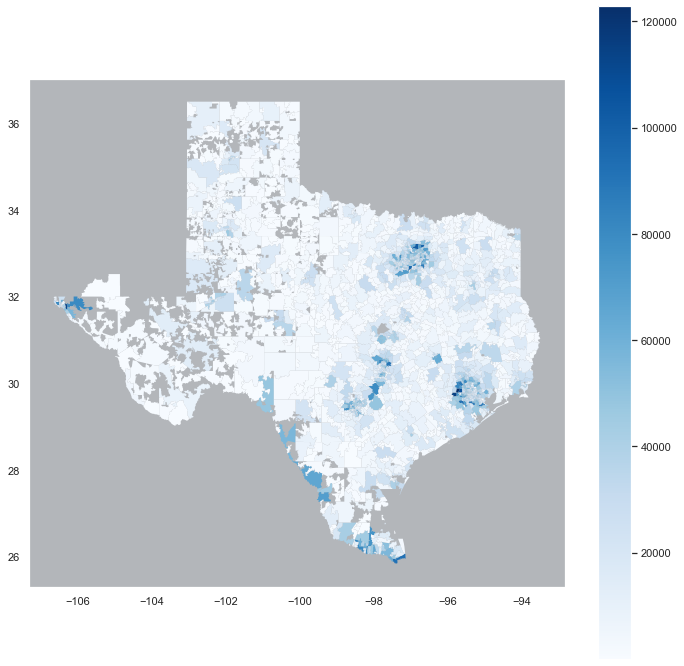

In [58]:
fig,ax = plt.subplots(figsize=(12,12))
popzip.plot(ax=ax, zorder=2, legend=True, column='pop', cmap='Blues', edgecolor='black', linewidth=0)
ax.set(facecolor = "#B3B6BA")
ax.grid(False)

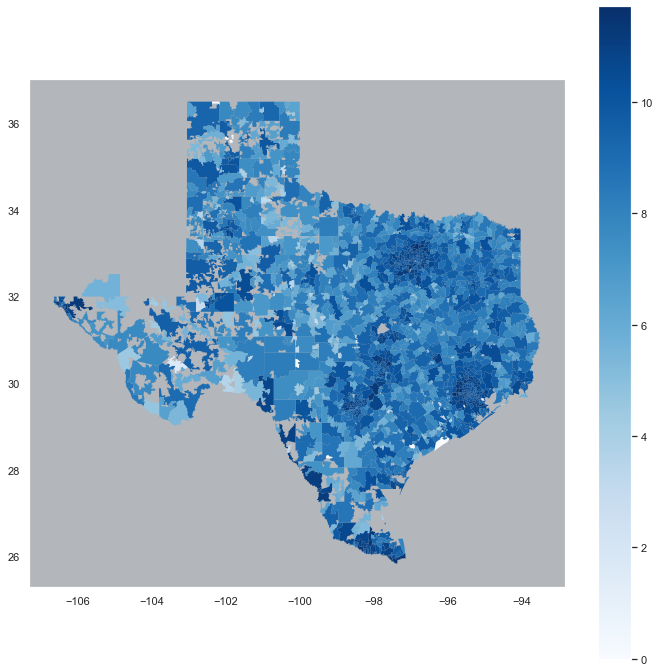

In [59]:
fig,ax = plt.subplots(figsize=(12,12))
popzip.plot(ax=ax, zorder=2, legend=True, column='pop_log', cmap='Blues', edgecolor='black', linewidth=0)
ax.set(facecolor = "#B3B6BA")
ax.grid(False)

In [60]:
city_zip = pd.read_csv('/Users/trevorban/Desktop/zri-data/complete/city_zip.csv').drop(columns='Unnamed: 0')

In [61]:
of_interest = city_zip.merge(popzip, how='inner', on='zip' )

In [62]:
of_interest = gpd.GeoDataFrame(of_interest)

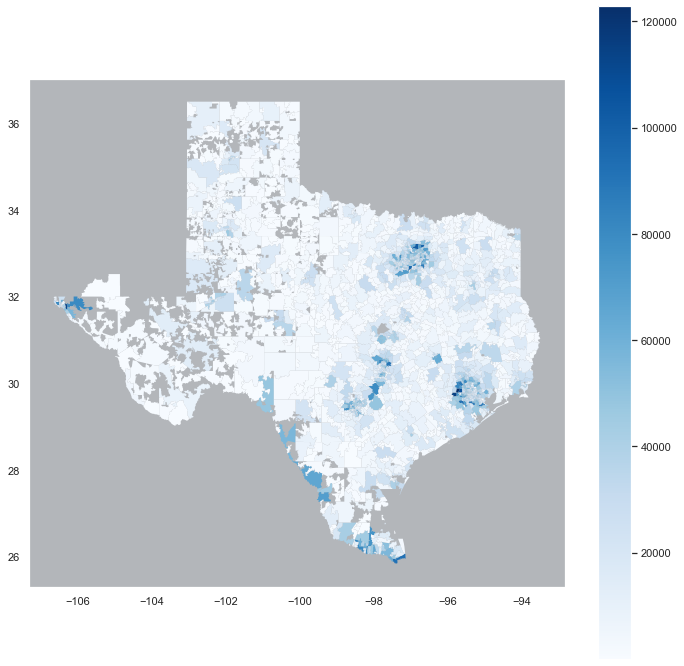

In [63]:
fig,ax = plt.subplots(figsize=(12,12))
popzip.plot(ax=ax, zorder=1, legend=True, column='pop', cmap='Blues', edgecolor='black', linewidth=0)
ax.set(facecolor = "#B3B6BA")
ax.grid(False)

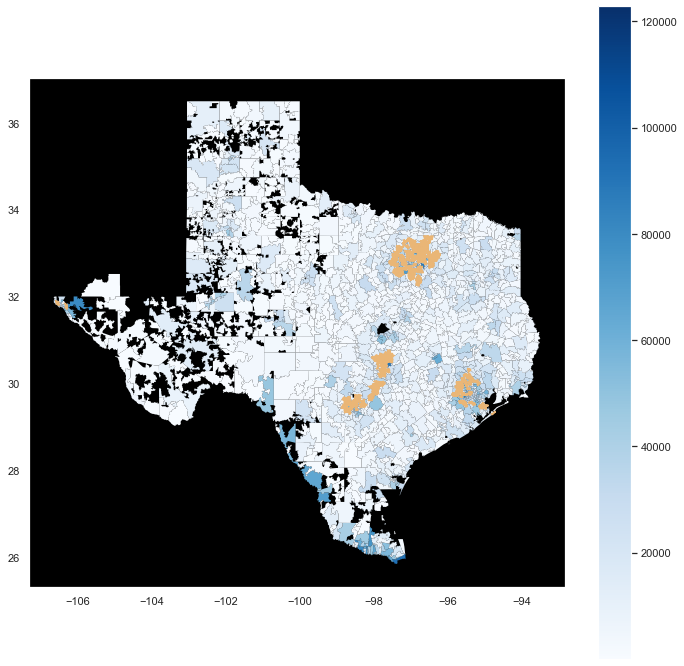

In [64]:
fig,ax = plt.subplots(figsize=(12,12))
popzip.plot(ax=ax, zorder=1, legend=True, column='pop', cmap='Blues', edgecolor='black', linewidth=0)
of_interest.plot(ax=ax, zorder=2, legend=False, color = '#eab676', edgecolor='#eab676', linewidth=1)
ax.set(facecolor = "black")
ax.grid(False)

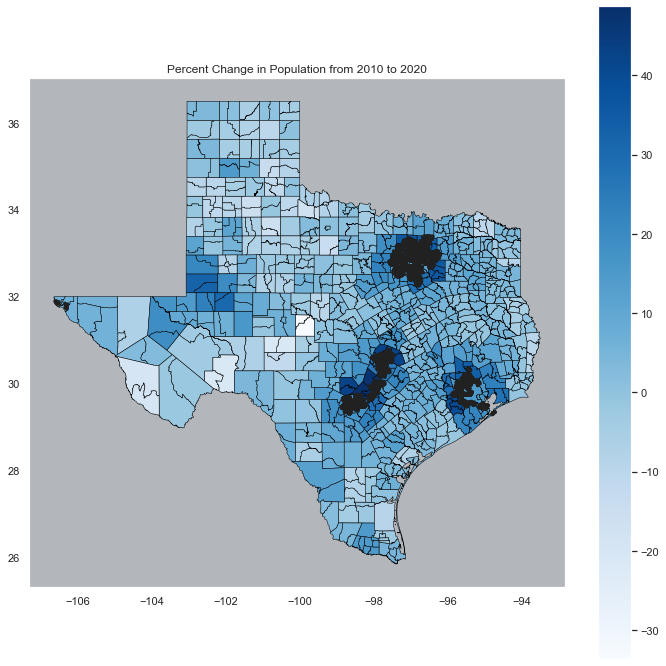

In [65]:
fig,ax = plt.subplots(figsize=(12,12))
x.plot(ax=ax, zorder=2, legend=True, cmap='Blues', edgecolor='black', linewidth=.5, column='pct_chg_10_20')
of_interest.plot(ax=ax, zorder=2, legend=True, color='#212121', edgecolor='#212121', linewidth=3)
ax.set(facecolor = "#B3B6BA")
ax.grid(False)
plt.title('Percent Change in Population from 2010 to 2020');